In [1]:
from eis.vcf_dataloader import SplicingVCFDataloader
from eis import Eis, predict_all_table

from eis.utils import max_varEff

Using TensorFlow backend.
/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [2]:
gtf = '../tests/data/test.gtf'
vcf = '../tests/data/test.vcf.gz'
fasta = '../tests/data/hg19.nochr.chr17.fa'
gtfIntervalTree = '../tests/data/test.pkl' # pickle exon interval Tree

In [3]:
dl = SplicingVCFDataloader(gtfIntervalTree, 
                          fasta,
                          vcf,
                          out_file=gtfIntervalTree,
                          split_seq=False, overhang=(50,10))

In [4]:
next(dl)

{'inputs': {'seq': 'TCCAGGAGAATGAATTGACACTAATCTCTGCTTGTGTTCTCTGTCTCCAGCAATTGGGCAGATGTGTGAGGCACCTGTGGTGACCCGAGAGTGGGTGTTGGACAGTGTAGCACTCTACCAGTGCCAGGAGCTGGACACCTACCTGATACCCCAGATCCCCCACAGCCACTACTGACTGCAGCCAGCCACAGGTACAGAGCCACAGGACCCCAAGAATGAGCTTACAAAGTGGCCTTTCCAGGCCCTGGGAGCTCCTCTCACTCTTCAGTCCTTCTACTGTCCTGGCTACTAAATATTTTATGTACATCAGCCTGAAAAGGACTTCTGGCTATGCAAGGGTCCCTTAAAGATTTTCTGCTTGAAGTCTCCCTTGGAAATCTGCCATGAGCACAAAATTATGGTAATTTTTCACCTGAGAAGATTTTAAAACCATTTAAACGCCACCAATTGAGCAAGATGCTGATTCATTATTTATCAGCCCTATTCTTTCTATTCAGGCTGTTGTTGGCTTAGGGCTGGAAGCACAGAGTGGCTTGGCCTCAAGAGAATAGCTGGTTTCCCTAAGTTTACTTCTCTAAAACCCTGTGTTCACAAAGGCAGAGAGTCAGACCCTTCAATGGAAGGAGAGTGCTTGGGATCGATTATGTGACTTAAAGTCAGAATAGTCCTTGGGCAGTTCTCAAATGTTGGAGTGGAACATTGGGGAGGAAATTCTGAGGCAGGTATTAGAAATGAAAAGGAAACTTGAAACCTGGGCATGGTGGCTCACGCCTGTAATCCCAGCACTTTGGGAGGCCAAGGTGGGCAGATCACTGGAGGTCAGGAGTTCGAAACCAGCCTGGCCAACATGGTGAAACCCCATCTCTACTAAAAATACAGAAATTAGCCGGTCATGGTGGTGGACACCTGTAATCCCAGCTACTCAGGTGGCTAAGGCAGGAGAATCACTTCAGCCCGGGAGGTGGAGGTTGCAGTGAGCC

In [5]:
model = Eis(
    exon_cut_l=0,
    exon_cut_r=0,
    acceptor_intron_cut=6,
    donor_intron_cut=6,
    acceptor_intron_len=50,
    acceptor_exon_len=3,
    donor_exon_len=5,
    donor_intron_len=13)

/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/keras/engine/saving.py:270: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [6]:
predictions = predict_all_table(model, dl, batch_size=1024, split_seq=False, assembly=True)

0it [00:00, ?it/s]/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/eis-0.2.0-py3.6.egg/eis/eis.py:150: UserWarning: None GT donor
  warnings.warn("None GT donor", UserWarning)
/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/eis-0.2.0-py3.6.egg/eis/eis.py:152: UserWarning: None AG donor
  warnings.warn("None AG donor", UserWarning)
2it [00:29, 14.65s/it]


In [7]:
predictions.head(10)

,ID,exons,EIS_diff
0,17:41197805:ACATCTGCC:['A'],17_41196313_41197819:-,0.003618
1,17:41197805:ACATCTGCC:['A'],17_41196312_41197819:-,0.003615
2,17:41197805:ACATCTGCC:['A'],17_41197580_41197819:-,0.046849
3,17:41197805:ACATCTGCC:['A'],17_41197646_41197819:-,0.050523
4,17:41197805:ACATCTGCC:['A'],17_41197695_41197819:-,0.042311
5,17:41197809:CTGCCCAAT:['C'],17_41196822_41197819:-,-0.200707
6,17:41197809:CTGCCCAAT:['C'],17_41196313_41197819:-,-0.207593
7,17:41197809:CTGCCCAAT:['C'],17_41196312_41197819:-,-0.207601
8,17:41197809:CTGCCCAAT:['C'],17_41197580_41197819:-,-0.137880
9,17:41197809:CTGCCCAAT:['C'],17_41197646_41197819:-,-0.114219


In [8]:
predictionsMax = max_varEff(predictions)

In [9]:
predictionsMax.head()

,ID,EIS_diff,exons
0,17:41197805:ACATCTGCC:['A'],0.050523,17_41197646_41197819:-
1,17:41197809:CTGCCCAAT:['C'],-0.207601,17_41196312_41197819:-
2,17:41197810:T:['A'],0.101059,17_41197695_41197819:-
3,17:41197811:G:['T'],0.328513,17_41197695_41197819:-
4,17:41197812:C:['A'],0.052036,17_41197695_41197819:-


In [10]:
import matplotlib.pyplot as plt 

In [11]:
%matplotlib inline

(array([  1.,   3.,  17.,  49., 119., 175., 531., 113.,  10.,   2.]),
 array([-10.72896106,  -9.14416446,  -7.55936787,  -5.97457128,
         -4.38977469,  -2.80497809,  -1.2201815 ,   0.36461509,
          1.94941168,   3.53420828,   5.11900487]),
 <a list of 10 Patch objects>)

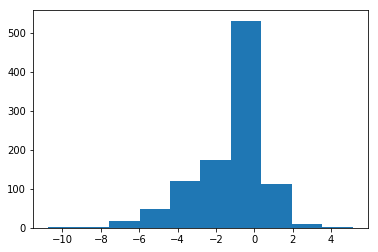

In [12]:
plt.hist(predictionsMax.EIS_diff)

In [13]:
predictionsMax.sort_values(['EIS_diff']).head()

,ID,EIS_diff,exons
691,17:41245766:CATATTGCTTATACTGCTGCTTATAGGTTCAGCT...,-10.728961,17_41245603_41246877:-
104,17:41201134:TTAC:['T'],-8.857750,17_41201138_41201211:-
159,17:41203079:CCT:['ATGTTG'],-7.963199,17_41203080_41203134:-
511,17:41226345:TACCTAGATCTTGCCTTGGCAAGTAAGATGTTTC...,-7.602323,17_41226348_41226538:-
248,17:41215348:AC:['A'],-7.406505,17_41215350_41215390:-


## Predict pathogenicity

In [14]:
dl = SplicingVCFDataloader(gtfIntervalTree, 
                          fasta,
                          vcf,
                          out_file=gtfIntervalTree,
                          split_seq=False, overhang=(50,10))

In [15]:
predictions = predict_all_table(model, dl, batch_size=1024, split_seq=False, assembly=True, pathogenicity=True)

0it [00:00, ?it/s]/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/eis-0.2.0-py3.6.egg/eis/eis.py:150: UserWarning: None GT donor
  warnings.warn("None GT donor", UserWarning)
/opt/modules/i12g/anaconda/3-5.0.1/envs/splicing/lib/python3.6/site-packages/eis-0.2.0-py3.6.egg/eis/eis.py:152: UserWarning: None AG donor
  warnings.warn("None AG donor", UserWarning)
2it [00:27, 13.88s/it]


In [17]:
predictionsMax = max_varEff(predictions)

In [18]:
predictionsMax.sort_values('EIS_diff', ascending=False).head()

,ID,EIS_diff,exons
577,17:41245766:CATATTGCTTATACTGCTGCTTATAGGTTCAGCT...,1.0,17_41243452_41246877:-
230,17:41215387:ACCCCTAAAGAGATCATAGA:['TATT'],1.0,17_41215377_41215390:-
712,17:41251814:CTTTTGAGGTTGTATCCGCTGCTTTGTCCTCAGA...,1.0,17_41251792_41251894:-
771,17:41256281:G:['C'],1.0,17_41256206_41256278:-
978,17:41276033:C:['CCAGATG'],1.0,17_41276034_41276132:-


In [19]:
import pandas as pd

In [20]:
df = pd.read_table(vcf, comment='#', header=None)
df.columns = ['CHROM', 'POS', 'ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO']

In [55]:
from cyvcf2 import VCF
vcff = VCF(vcf)

In [56]:
pathogenic = []
for v in vcff:
    pathogenic.append(v.INFO.get("CLNSIG"))

df['Pathogenic'] = pathogenic

In [89]:
df['ID'] = df.CHROM.map(str) + ':' + df.POS.map(str)+':' + df.REF +':'+ "['" + df.ALT + "']"

In [96]:
# add pathogenicity annotation to the prediction table
merged = predictionsMax.merge(df, on='ID')

In [99]:
# only keep clear pathogenicity annotation
merged = merged[merged.Pathogenic.isin(['Pathogenic', 'Benign'])]
merged['Pathogenic'] = merged['Pathogenic'] == 'Pathogenic'

In [113]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, roc_auc_score

In [104]:
roc_auc_score(merged.Pathogenic, merged.EIS_diff)

0.6629153269024652

In [105]:
sum(merged.Pathogenic)

311

In [106]:
merged.shape

(335, 11)

In [107]:
fpr, tpr, _ = roc_curve(merged.Pathogenic, merged.EIS_diff)

In [109]:
import matplotlib.pyplot as plt

%matplotlib inline

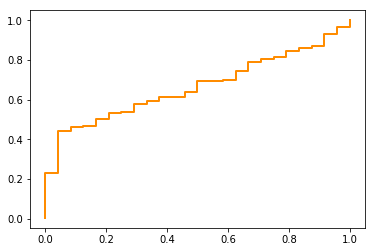

In [111]:
plt.plot(fpr, tpr, color='darkorange',
         lw=2)

(array([ 13.,  25.,  21.,  22.,  10.,   1.,  12.,   3.,  16., 212.]),
 array([2.16382196e-04, 1.00194744e-01, 2.00173106e-01, 3.00151468e-01,
        4.00129829e-01, 5.00108191e-01, 6.00086553e-01, 7.00064915e-01,
        8.00043276e-01, 9.00021638e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

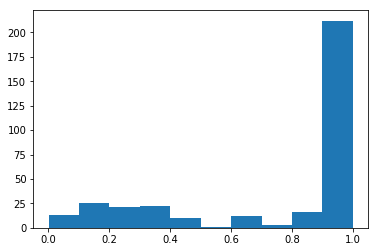

In [112]:
plt.hist(merged.EIS_diff)

In [114]:
precision, recall, _ = precision_recall_curve(merged.Pathogenic, merged.EIS_diff)

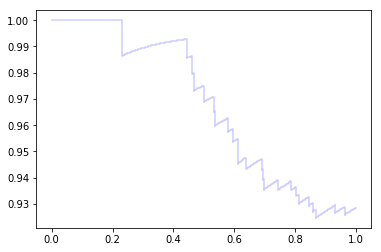

In [115]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')